In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-mask-detection/annotations/maksssksksss737.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss410.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss537.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss295.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss771.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss234.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss620.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss70.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss281.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss393.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss296.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss756.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss260.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss57.xml
/kaggle/input/face-mask-detection/annotations/maksssksksss224.xml
/kaggle/inpu

In [3]:
import tensorflow as tf
print("GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

GPUs Available: 2


In [4]:
import os
import json
import matplotlib.pyplot as plt
import cv2
from xml.etree import ElementTree as ET

In [5]:
dataset_path = "/kaggle/input/face-mask-detection/images"
annotations_path = "/kaggle/input/face-mask-detection/annotations"

images = os.listdir(dataset_path)
annotations = os.listdir(annotations_path)

print(f"Number of images: {len(images)}")
print(f"Number of annotations: {len(annotations)}")

Number of images: 853
Number of annotations: 853


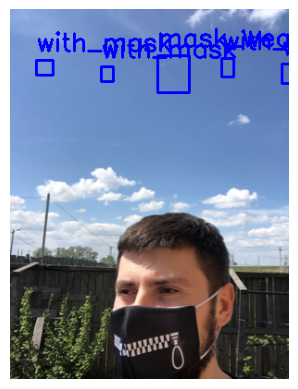

In [6]:
def visualize_annotation(image_path, annotation_path):
    image = cv2.imread(image_path)
    tree = ET.parse(annotation_path)
    root = tree.getroot()
    for obj in root.findall('object'):
        name = obj.find('name').text
        bbox = obj.find('bndbox')
        x_min, y_min, x_max, y_max = [int(bbox.find(tag).text) for tag in ['xmin', 'ymin', 'xmax', 'ymax']]
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
        cv2.putText(image, name, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

visualize_annotation(os.path.join(dataset_path, images[0]), os.path.join(annotations_path, annotations[0]))

In [7]:
from sklearn.model_selection import train_test_split

train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
print(f"Training images: {len(train_images)}, Testing images: {len(test_images)}")

Training images: 682, Testing images: 171


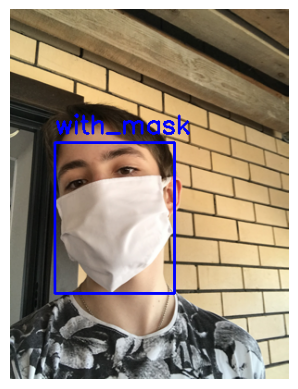

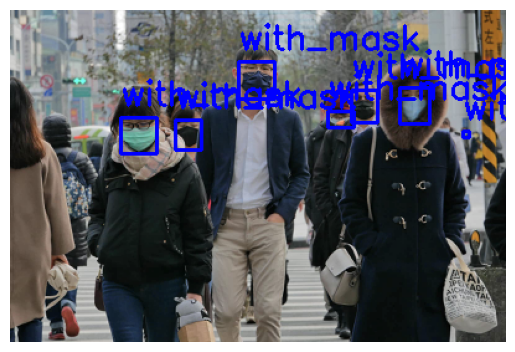

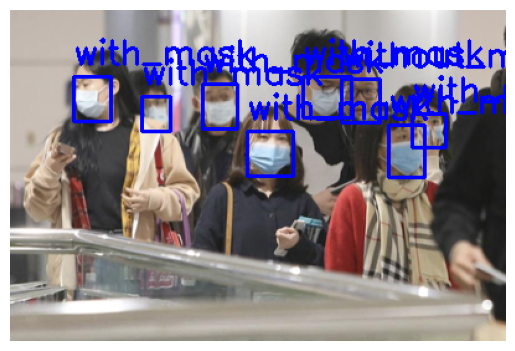

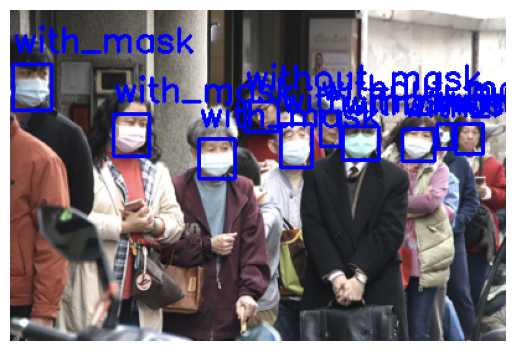

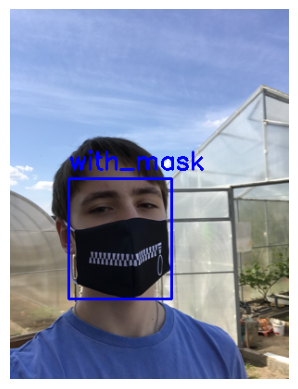

In [8]:
import random

def visualize_random_annotations(dataset_path, annotations_path, n=5):
    random_images = random.sample(images, n)
    for img_name in random_images:
        annotation_name = img_name.replace('.png', '.xml') 
        image_path = os.path.join(dataset_path, img_name)
        annotation_path = os.path.join(annotations_path, annotation_name)
        visualize_annotation(image_path, annotation_path)

visualize_random_annotations(dataset_path, annotations_path, n=5)

In [9]:
import os
from collections import Counter
from xml.etree import ElementTree as ET

annotations_path = "/kaggle/input/face-mask-detection/annotations"  

def count_classes(annotations_path):
    class_counts = Counter()
    for annotation_file in os.listdir(annotations_path):  
        annotation_path = os.path.join(annotations_path, annotation_file)
        tree = ET.parse(annotation_path)
        root = tree.getroot()
        for obj in root.findall('object'):
            name = obj.find('name').text
            class_counts[name] += 1
    return class_counts

class_distribution = count_classes(annotations_path)
print("Class Distribution:", class_distribution)

Class Distribution: Counter({'with_mask': 3232, 'without_mask': 717, 'mask_weared_incorrect': 123})


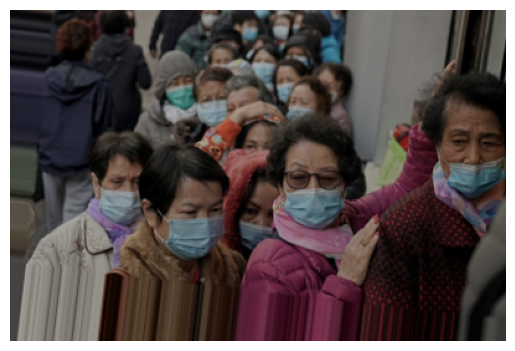

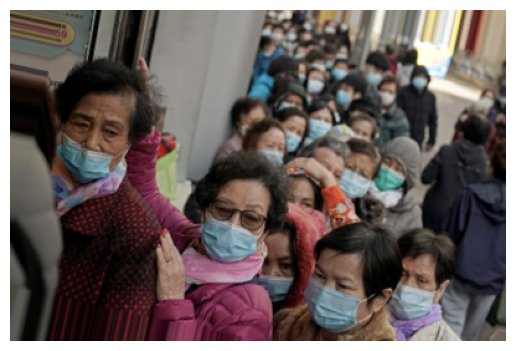

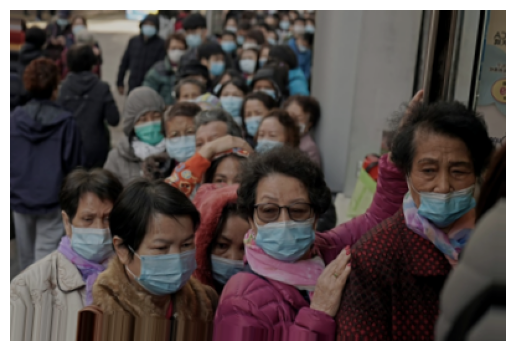

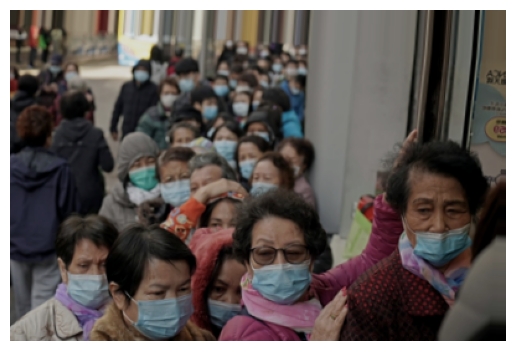

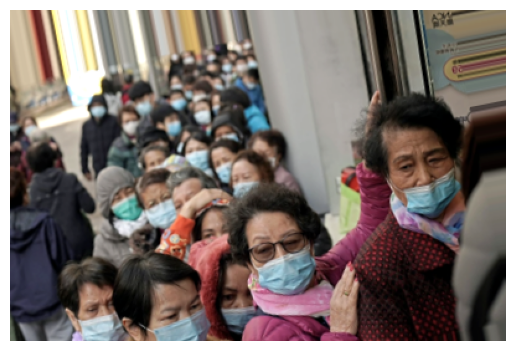

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True
)

sample_image_path = "/kaggle/input/face-mask-detection/images/maksssksksss11.png"  
image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.expand_dims(image, axis=0) 

augmented_images = datagen.flow(image, batch_size=1)
for i in range(5):  
    augmented_image = next(augmented_images)[0].astype('uint8')
    plt.imshow(augmented_image)
    plt.axis('off')
    plt.show()

In [2]:
from sklearn.model_selection import train_test_split
from xml.etree import ElementTree as ET
import os

dataset_path = "/kaggle/input/face-mask-detection/images" 
annotations_path = "/kaggle/input/face-mask-detection/annotations" 

images = [img for img in os.listdir(dataset_path) if img.endswith(('.png', '.jpg', '.jpeg'))]

def get_labels(annotations_path):
    labels = []
    for annotation_file in os.listdir(annotations_path):
        annotation_path = os.path.join(annotations_path, annotation_file)
        tree = ET.parse(annotation_path)
        root = tree.getroot()
        for obj in root.findall('object'):
            labels.append(obj.find('name').text)
            break  # Assuming one object per image
    return labels

labels = get_labels(annotations_path)

train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, stratify=labels, random_state=42
)

val_images, test_images, val_labels, test_labels = train_test_split(
    test_images, test_labels, test_size=0.5, stratify=test_labels, random_state=42
)

print(f"Training images: {len(train_images)}")
print(f"Validation images: {len(val_images)}")
print(f"Testing images: {len(test_images)}")

Training images: 682
Validation images: 85
Testing images: 86
Number of images: 853


NameError: name 'annotations' is not defined

In [12]:
from collections import Counter

def check_distribution(images, annotations_path):
    labels = []
    for img_name in images:
        annotation_file = img_name.replace('.png', '.xml') 
        annotation_path = os.path.join(annotations_path, annotation_file)
        tree = ET.parse(annotation_path)
        root = tree.getroot()
        for obj in root.findall('object'):
            labels.append(obj.find('name').text)
    return Counter(labels)

train_dist = check_distribution(train_images, annotations_path)
val_dist = check_distribution(val_images, annotations_path)
test_dist = check_distribution(test_images, annotations_path)

print("Training Set Distribution:", train_dist)
print("Validation Set Distribution:", val_dist)
print("Testing Set Distribution:", test_dist)

Training Set Distribution: Counter({'with_mask': 2506, 'without_mask': 575, 'mask_weared_incorrect': 103})
Validation Set Distribution: Counter({'with_mask': 425, 'without_mask': 85, 'mask_weared_incorrect': 15})
Testing Set Distribution: Counter({'with_mask': 301, 'without_mask': 57, 'mask_weared_incorrect': 5})


In [13]:
import cv2
import numpy as np

def preprocess_image(image_path, target_size):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    image = image / 255.0
    return image

In [14]:
target_size = (224, 224)

train_images_processed = [
    preprocess_image(os.path.join(dataset_path, img), target_size) for img in train_images
]
val_images_processed = [
    preprocess_image(os.path.join(dataset_path, img), target_size) for img in val_images
]
test_images_processed = [
    preprocess_image(os.path.join(dataset_path, img), target_size) for img in test_images
]

print("Preprocessing complete!")

Preprocessing complete!


In [15]:
def parse_annotations(image_list, annotations_path):
    data = []
    for img_name in image_list:
        annotation_file = img_name.replace('.png', '.xml')  # Adjust for your file extensions
        annotation_path = os.path.join(annotations_path, annotation_file)
        tree = ET.parse(annotation_path)
        root = tree.getroot()
        boxes = []
        for obj in root.findall('object'):
            name = obj.find('name').text
            bbox = obj.find('bndbox')
            x_min = int(bbox.find('xmin').text)
            y_min = int(bbox.find('ymin').text)
            x_max = int(bbox.find('xmax').text)
            y_max = int(bbox.find('ymax').text)
            boxes.append({
                'class': name,
                'bbox': [x_min, y_min, x_max, y_max]
            })
        data.append({
            'image_name': img_name,
            'boxes': boxes
        })
    return data

train_labels = parse_annotations(train_images, annotations_path)
val_labels = parse_annotations(val_images, annotations_path)
test_labels = parse_annotations(test_images, annotations_path)

print("Annotations parsed successfully!")

Annotations parsed successfully!


In [16]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Input
from tensorflow.keras.models import Model

def build_ssd_model(input_shape=(224, 224, 3), num_classes=3, max_objects=115):
    # Base network: MobileNet
    base_model = MobileNet(input_shape=input_shape, include_top=False, weights='imagenet')
    
    # Add SSD-specific layers
    x = base_model.output
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    
    # Bounding box predictions
    bbox_output = Dense(max_objects * 4, activation='linear', name='bbox')(x)
    bbox_output = tf.keras.layers.Reshape((max_objects, 4), name='bbox_output')(bbox_output)
    
    # Class predictions
    class_output = Dense(max_objects * num_classes, activation='softmax', name='class')(x)
    class_output = tf.keras.layers.Reshape((max_objects, num_classes), name='class_output')(class_output)
    
    # Define model
    model = Model(inputs=base_model.input, outputs=[bbox_output, class_output])
    return model

ssd_model = build_ssd_model()
ssd_model.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 32)   │            128 │ conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_dw_1                 │ (None, 112, 112, 32)   │            288 │ conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_dw_1_bn              │ (None, 112, 112, 32)   │            128 │ conv_dw_1[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_dw_1_relu (ReLU)     │ (None, 112, 112, 32)   │              0 │ conv_dw_1_bn[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_pw_1 (Conv2D)        │ (None, 112, 112, 64)   │          2,048 │ conv_dw_1_relu[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_pw_1_bn              │ (None, 112, 112, 64)   │            256 │ conv_pw_1[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_pw_1_relu (ReLU)     │ (None, 112, 112, 64)   │              0 │ conv_pw_1_bn[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_pad_2                │ (None, 113, 113, 64)   │              0 │ conv_pw_1_relu[0][0]   │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_dw_2                 │ (None, 56, 56, 64)     │            576 │ conv_pad_2[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_dw_2_bn              │ (None, 56, 56, 64)     │            256 │ conv_dw_2[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_dw_2_relu (ReLU)     │ (None, 56, 56, 64)     │              0 │ conv_dw_2_bn[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_pw_2 (Conv2D)        │ (None, 56, 56, 128)    │          8,192 │ conv_dw_2_relu[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_pw_2_bn              │ (None, 56, 56, 128)    │            512 │ conv_pw_2[0][0]        │
│ (BatchNormalization) 

 Total params: 55,435,237 (211.47 MB)

 Trainable params: 55,413,349 (211.39 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [17]:
for layer in ssd_model.layers:
    print(layer.name)

input_layer
conv1
conv1_bn
conv1_relu
conv_dw_1
conv_dw_1_bn
conv_dw_1_relu
conv_pw_1
conv_pw_1_bn
conv_pw_1_relu
conv_pad_2
conv_dw_2
conv_dw_2_bn
conv_dw_2_relu
conv_pw_2
conv_pw_2_bn
conv_pw_2_relu
conv_dw_3
conv_dw_3_bn
conv_dw_3_relu
conv_pw_3
conv_pw_3_bn
conv_pw_3_relu
conv_pad_4
conv_dw_4
conv_dw_4_bn
conv_dw_4_relu
conv_pw_4
conv_pw_4_bn
conv_pw_4_relu
conv_dw_5
conv_dw_5_bn
conv_dw_5_relu
conv_pw_5
conv_pw_5_bn
conv_pw_5_relu
conv_pad_6
conv_dw_6
conv_dw_6_bn
conv_dw_6_relu
conv_pw_6
conv_pw_6_bn
conv_pw_6_relu
conv_dw_7
conv_dw_7_bn
conv_dw_7_relu
conv_pw_7
conv_pw_7_bn
conv_pw_7_relu
conv_dw_8
conv_dw_8_bn
conv_dw_8_relu
conv_pw_8
conv_pw_8_bn
conv_pw_8_relu
conv_dw_9
conv_dw_9_bn
conv_dw_9_relu
conv_pw_9
conv_pw_9_bn
conv_pw_9_relu
conv_dw_10
conv_dw_10_bn
conv_dw_10_relu
conv_pw_10
conv_pw_10_bn
conv_pw_10_relu
conv_dw_11
conv_dw_11_bn
conv_dw_11_relu
conv_pw_11
conv_pw_11_bn
conv_pw_11_relu
conv_pad_12
conv_dw_12
conv_dw_12_bn
conv_dw_12_relu
conv_pw_12
conv_pw_12_bn
con

In [18]:
print(train_labels[:5])  # Check the first 5 labels

[{'image_name': 'maksssksksss474.png', 'boxes': [{'class': 'with_mask', 'bbox': [1, 163, 32, 198]}, {'class': 'with_mask', 'bbox': [49, 159, 76, 183]}, {'class': 'with_mask', 'bbox': [154, 45, 178, 67]}, {'class': 'with_mask', 'bbox': [238, 21, 260, 47]}]}, {'image_name': 'maksssksksss236.png', 'boxes': [{'class': 'without_mask', 'bbox': [163, 164, 269, 299]}]}, {'image_name': 'maksssksksss32.png', 'boxes': [{'class': 'with_mask', 'bbox': [177, 46, 200, 70]}, {'class': 'with_mask', 'bbox': [305, 32, 338, 60]}]}, {'image_name': 'maksssksksss163.png', 'boxes': [{'class': 'with_mask', 'bbox': [209, 108, 226, 126]}, {'class': 'with_mask', 'bbox': [161, 124, 184, 152]}]}, {'image_name': 'maksssksksss30.png', 'boxes': [{'class': 'with_mask', 'bbox': [56, 41, 94, 81]}, {'class': 'without_mask', 'bbox': [119, 61, 146, 87]}, {'class': 'with_mask', 'bbox': [166, 59, 196, 83]}, {'class': 'with_mask', 'bbox': [220, 31, 249, 64]}, {'class': 'with_mask', 'bbox': [262, 66, 290, 95]}, {'class': 'witho

In [19]:
# Mapping classes to numeric IDs
class_mapping = {'with_mask': 0, 'without_mask': 1, 'mask_weared_incorrect': 2}

# Extract bounding boxes and class labels
train_bboxes = np.array([
    box['bbox'] for label in train_labels for box in label['boxes']
])
train_classes = np.array([
    class_mapping[box['class']] for label in train_labels for box in label['boxes']
])

val_bboxes = np.array([
    box['bbox'] for label in val_labels for box in label['boxes']
])
val_classes = np.array([
    class_mapping[box['class']] for label in val_labels for box in label['boxes']
])

print("Bounding boxes and class labels extracted successfully!")

Bounding boxes and class labels extracted successfully!


In [20]:
ssd_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss={
        'bbox_output': 'mean_squared_error',  
        'class_output': 'categorical_crossentropy'  
    },
    metrics={
        'class_output': 'accuracy'  
    }
)

In [21]:
from tensorflow.keras.utils import to_categorical

# Group bounding boxes and classes by image
def group_labels_by_image(labels, num_classes):
    grouped_bboxes = []
    grouped_classes = []
    for label in labels:
        bboxes = [box['bbox'] for box in label['boxes']]
        classes = [box['class'] for box in label['boxes']]
        grouped_bboxes.append(bboxes)
        grouped_classes.append(to_categorical([class_mapping[c] for c in classes], num_classes))
    return grouped_bboxes, grouped_classes

train_grouped_bboxes, train_grouped_classes = group_labels_by_image(train_labels, num_classes=3)
val_grouped_bboxes, val_grouped_classes = group_labels_by_image(val_labels, num_classes=3)

In [22]:
import numpy as np

def pad_labels(bboxes, classes, max_objects):
    padded_bboxes = np.zeros((len(bboxes), max_objects, 4))
    padded_classes = np.zeros((len(classes), max_objects, 3))
    for i in range(len(bboxes)):
        n_objects = len(bboxes[i])
        padded_bboxes[i, :n_objects] = bboxes[i]
        padded_classes[i, :n_objects] = classes[i]
    return padded_bboxes, padded_classes

# Recalculate max_objects globally
max_objects = max(
    max(len(label['boxes']) for label in train_labels),
    max(len(label['boxes']) for label in val_labels)
)

# Pad bounding boxes and classes
train_padded_bboxes, train_padded_classes = pad_labels(train_grouped_bboxes, train_grouped_classes, max_objects)
val_padded_bboxes, val_padded_classes = pad_labels(val_grouped_bboxes, val_grouped_classes, max_objects)

print(f"Maximum objects per image: {max_objects}")
print("Padding successful!")

Maximum objects per image: 115
Padding successful!


In [23]:
import tensorflow as tf
tf.debugging.set_log_device_placement(True) 

In [24]:
!nvidia-smi

Thu Jan  2 09:25:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P0             28W /   70W |    1159MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [28]:
import tensorflow as tf
with tf.device('/GPU:0'):
    
    history = ssd_model.fit(
        x=np.array(train_images_processed), 
        y={'bbox_output': train_padded_bboxes, 'class_output': train_padded_classes},  # Correct labels
            validation_data=(
        np.array(val_images_processed),
        {'bbox_output': val_padded_bboxes, 'class_output': val_padded_classes}
        ),
        batch_size=16,
        epochs=80
    )
pass

Epoch 1/80
43/43 ━━━━━━━━━━━━━━━━━━━━ 46s 445ms/step - class_output_accuracy: 0.1792 - loss: nan - val_class_output_accuracy: 0.0015 - val_loss: nan
Epoch 2/80
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - class_output_accuracy: 0.0013 - loss: nan - val_class_output_accuracy: 0.0015 - val_loss: nan
Epoch 3/80
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - class_output_accuracy: 0.0012 - loss: nan - val_class_output_accuracy: 0.0015 - val_loss: nan
Epoch 4/80
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - class_output_accuracy: 0.0013 - loss: nan - val_class_output_accuracy: 0.0015 - val_loss: nan
Epoch 5/80
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - class_output_accuracy: 0.0013 - loss: nan - val_class_output_accuracy: 0.0015 - val_loss: nan
Epoch 6/80
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - class_output_accuracy: 0.0012 - loss: nan - val_class_output_accuracy: 0.0015 - val_loss: nan
Epoch 7/80
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - class_output_accuracy: 0.0015 - loss: nan - val_class_output_ac